## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





c:\Users\leona\miniconda3\envs\amb_leo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


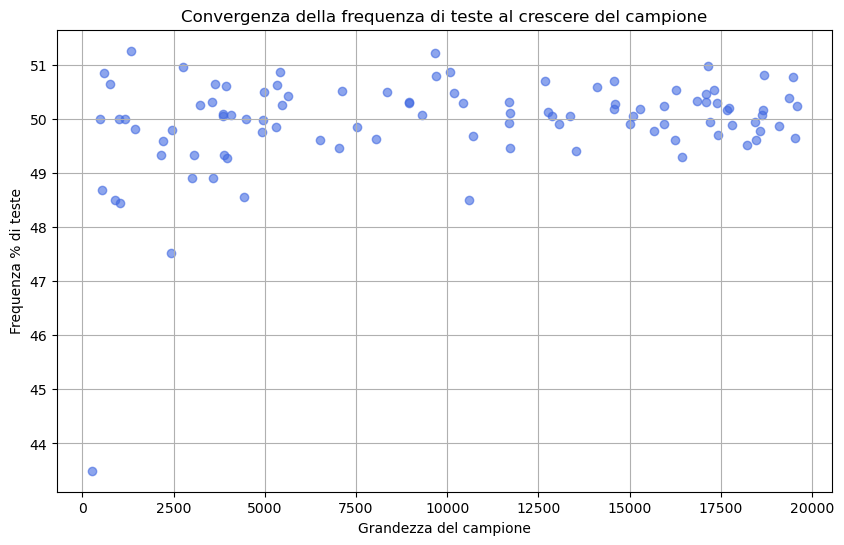

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt  
def lancio_moneta(n):
    evento = np.random.choice([0,1], size=n, replace=True )
    conteggio_testa = np.sum(evento == 1)
    freq_perc = (conteggio_testa/len(evento))*100
    return freq_perc
lista_campioni = np.random.randint(10, 20001, size=100)
lista_freq_perc = [lancio_moneta(value) for value in lista_campioni]
plt.figure(figsize=(10, 6))
plt.scatter(lista_campioni, lista_freq_perc, alpha=0.6, color='royalblue')
plt.xlabel('Grandezza del campione')
plt.ylabel('Frequenza % di teste')
plt.title('Convergenza della frequenza di teste al crescere del campione')
plt.grid(True)
plt.show()




## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

>Numero righe:891 
>Numero colonne:12 

>Valor mancanti per colonna :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Non ci sono righe duplicate



C:\Users\leona\AppData\Local\Temp\ipykernel_13360\647788161.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'] = df['Embarked'].fillna(valore_frequente, inplace=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_13360\647788161.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

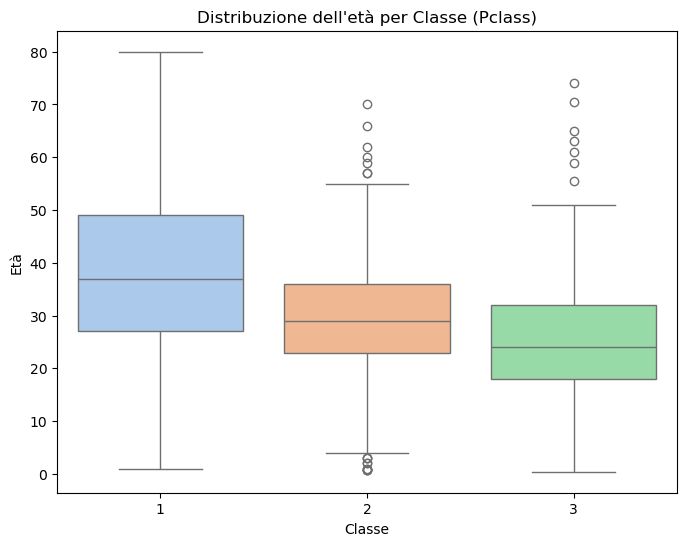

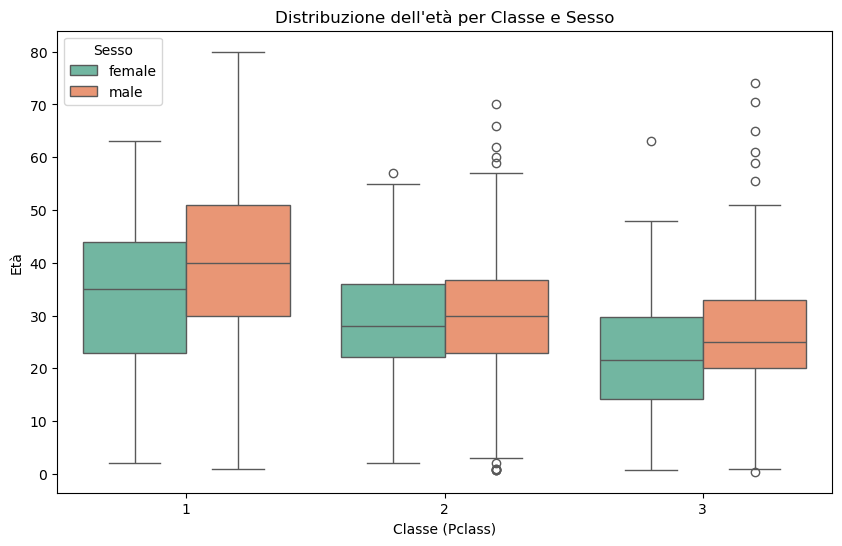

In [2]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
righe, colonne = df.shape
print('>Numero righe:{} \n>Numero colonne:{} \n'.format(righe,colonne))
valori_mancanti = df.isna().sum()
print('>Valor mancanti per colonna :\n{}\n'.format(valori_mancanti))
valore_frequente = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(valore_frequente, inplace=True)
df = df.dropna(subset=['Age'])
if(df.duplicated().sum() ==0): print('Non ci sono righe duplicate\n')
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.groupby('Pclass')['Age'].mean()
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='pastel')
plt.title('Distribuzione dell\'età per Classe (Pclass)')
plt.xlabel('Classe')
plt.ylabel('Età')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df, palette='Set2')
plt.title("Distribuzione dell'età per Classe e Sesso")
plt.xlabel('Classe (Pclass)')
plt.ylabel('Età')
plt.legend(title='Sesso')
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

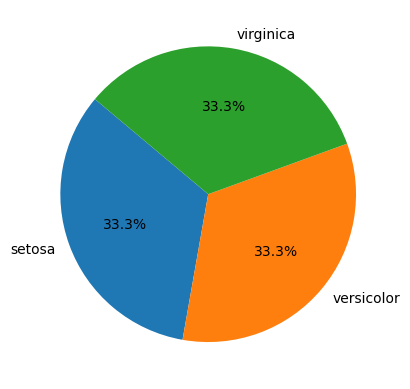

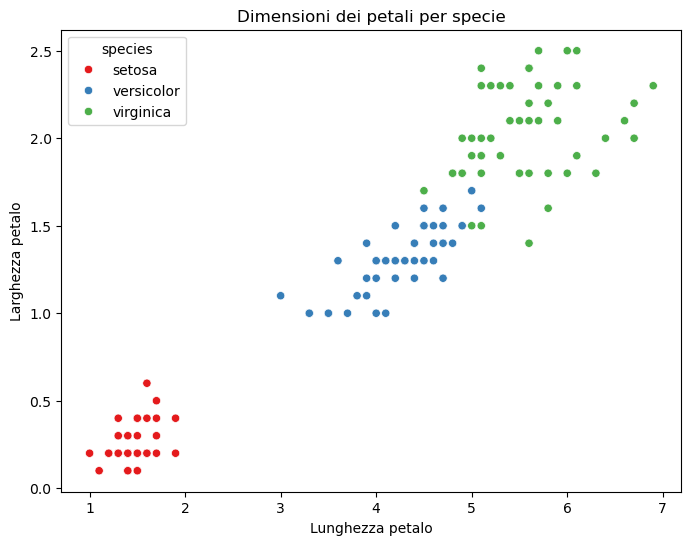

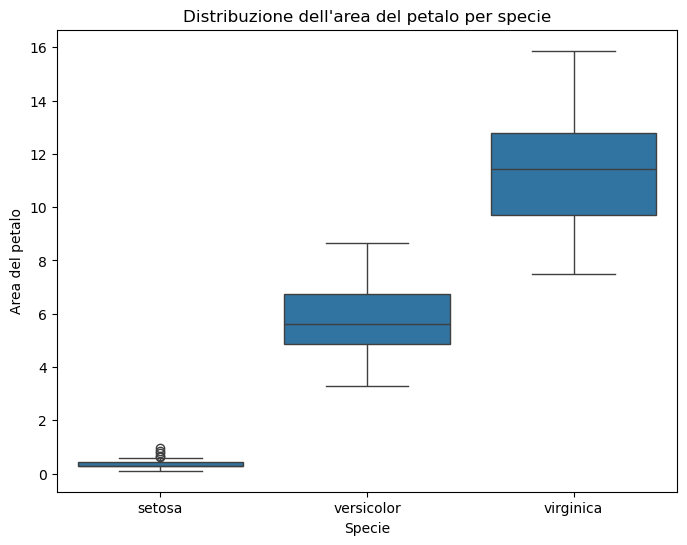

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

df = pd.read_csv(url)
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.1f%%', startangle=140)
medie_petali = df.groupby(['species'])[['petal_length','petal_width']].mean()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1')
plt.title('Dimensioni dei petali per specie')
plt.xlabel('Lunghezza petalo')
plt.ylabel('Larghezza petalo')
plt.show()
df['area_petalo'] = df['petal_length']*df['petal_width']
area_media = df.groupby('species')['area_petalo'].mean()
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='area_petalo')
plt.title('Distribuzione dell\'area del petalo per specie')
plt.xlabel('Specie')
plt.ylabel('Area del petalo')
plt.show()